In [1]:
# Importacao das bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Leitura do arquivo

df = pd.read_csv('/content/dataset.csv')
df.sample(5)

,data_medicao,nome_condominio,quantidade_placas,potencia_placa_kW,consumo_kWh,quantidade_habitantes,quantidade_torres,quantidade_apartamentos,quantidade_ar_condicionado,energia_solar_gerada_kWh,energia_recomendada_kWh
90754,2008-02-26,Condominio_22,36,0.35,5892.568,484,5,60,60,55.94,17856.25
136280,2019-05-07,Condominio_34,26,0.35,4191.080,404,9,171,342,27.31,13970.28
122415,2020-03-10,Condominio_50,49,0.35,4953.630,484,7,112,112,60.31,16512.09
128320,2012-01-23,Condominio_37,60,0.35,5034.304,401,10,170,170,86.80,15255.48
127095,2023-05-09,Condominio_4,43,0.30,4249.400,380,2,40,40,46.66,14164.68


In [3]:
# Vendo informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145000 entries, 0 to 144999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   data_medicao                145000 non-null  object 
 1   nome_condominio             145000 non-null  object 
 2   quantidade_placas           145000 non-null  int64  
 3   potencia_placa_kW           145000 non-null  float64
 4   consumo_kWh                 145000 non-null  float64
 5   quantidade_habitantes       145000 non-null  int64  
 6   quantidade_torres           145000 non-null  int64  
 7   quantidade_apartamentos     145000 non-null  int64  
 8   quantidade_ar_condicionado  145000 non-null  int64  
 9   energia_solar_gerada_kWh    145000 non-null  float64
 10  energia_recomendada_kWh     145000 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 12.2+ MB


## Detalhes do dataset

Podemos verificar que o dataset é bem completo e não possui colunas nulas, isso vai ajudar a treinar nosso modelo.

### Informações sobre as colunas

 - data_medicao  
   A data que foi tirado aquela medição.

 - nome_condominio  
   O nome do condomínio.

 - quantidade_placas  
   A quantidade de placas que o condomínio tinha no dia que foi tirado aquela medição.

 - potencia_placa_kW  
   A potência daquela placa no dia daquela medição.

 - consumo_kWh:  
   O consumo de energia do condomínio naquele dia.

 - quantidade_habitantes:  
   A quantidade de habitantes que tinha no condomínio naquele dia.

 - energia_solar_gerada_kWh:  
   A energia que estava sendo gerada naquele dia.

 - energia_recomendada_kWh:  
   A quantidade de energia recomendada



In [4]:
df.head()

,data_medicao,nome_condominio,quantidade_placas,potencia_placa_kW,consumo_kWh,quantidade_habitantes,quantidade_torres,quantidade_apartamentos,quantidade_ar_condicionado,energia_solar_gerada_kWh,energia_recomendada_kWh
0,2004-09-22,Condominio_38,35,0.35,3963.1700,372,2,40,40,54.34,13210.56
1,2021-02-22,Condominio_5,31,0.30,5490.6720,453,8,160,320,41.06,16638.38
2,2023-09-08,Condominio_17,21,0.35,5028.9500,392,3,42,84,29.19,16763.16
3,2010-06-09,Condominio_13,45,0.35,6466.8240,446,8,104,104,52.16,20529.60
4,2003-07-24,Condominio_19,59,0.30,7013.9895,449,8,88,176,53.68,22266.63


In [5]:
# Primeiro vamos transformar a coluna em uma data que o python consiga entender
df['data_medicao'] = pd.to_datetime(df['data_medicao'])

# Extraindo o mês para classificar a estação do ano
df['mes'] = df['data_medicao'].apply(lambda x: x.month)
# Contando os meses
df['mes'].value_counts()


,count
mes,
1,14274
3,12635
5,12061
7,11976
2,11959
10,11953
8,11924
12,11917
9,11655


In [6]:
# Aplicando a função para marcar a estação do ano
def get_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

df['estacao'] = df['mes'].apply(get_estacao)
df['estacao'].value_counts()


,count
estacao,
Verão,38150
Outono,36293
Inverno,35437
Primavera,35120


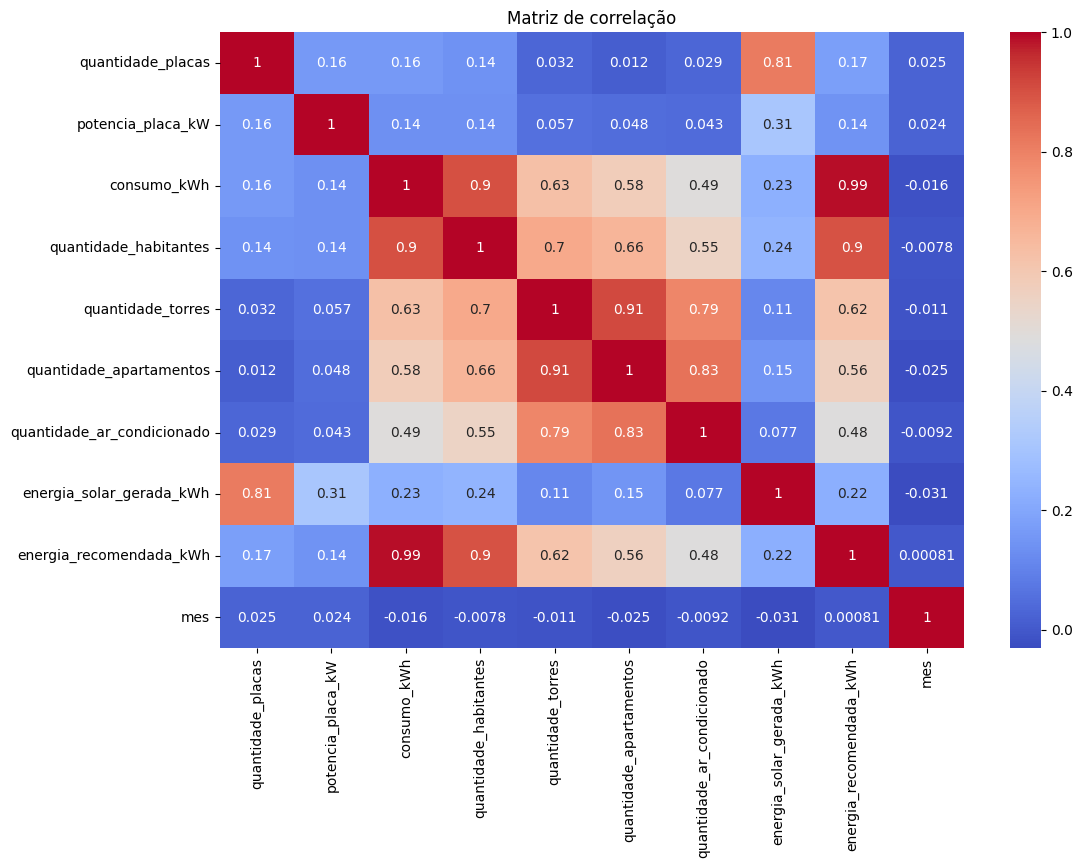

In [7]:
# Plotando a gráfico de correlação das colubas
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

## Analise dos gráficos

A coluna 'consumo_kWh' tem uma relação positiva muito forte com a nossa coluna alvo ('energia_recomendada_kWh') assim como a coluna quantidade de habitantes.

As colunas quantidade de torres e quantidade de apartamentos também tem uma boa relação com a nossa coluna alvo, então é interresantes usar elas também no treinamento do modelo.

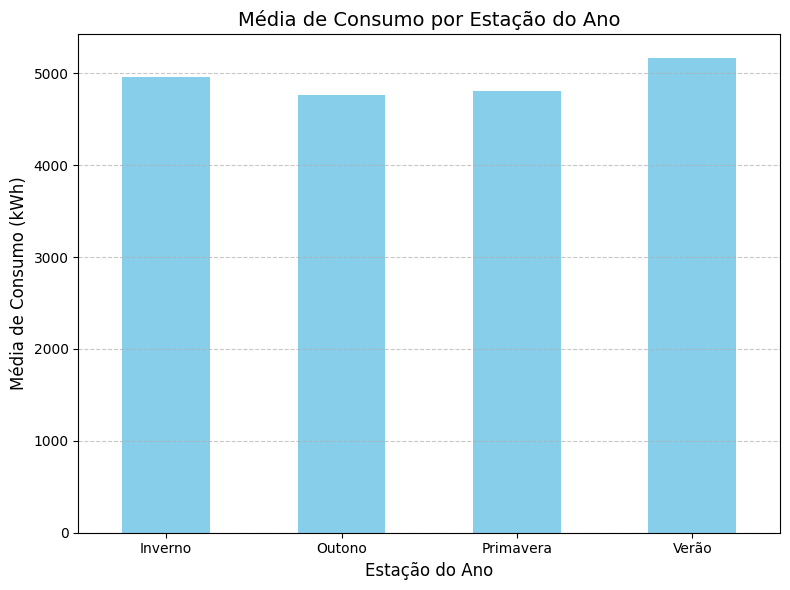

In [8]:
# Calcular a média de consumo por estação
media_consumo_estacao = df.groupby('estacao')['consumo_kWh'].mean()

# Plotar o gráfico
plt.figure(figsize=(8, 6))
ax = media_consumo_estacao.plot(kind='bar', color='skyblue')

# Configurar o gráfico
plt.title('Média de Consumo por Estação do Ano', fontsize=14)
plt.xlabel('Estação do Ano', fontsize=12)
plt.ylabel('Média de Consumo (kWh)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Podemos verificar que no Verão e Inverno temos uma quantidade maior de consumo de energia elétrica, podendo estar associado com a alta utilização de ar-condicionado (Verão) e de aquecedores(Inverno) que são altamente usados nessas estações do ano.

Como vimos que, a estação do ano pode aumentar o consumo de energia daquela comunidade, também vamos usar essa coluna para treinar o nosso modelo. Dessa forma, como a estação do ano pode impactar o resultado final, é interresante também usa-las no treinamento do modelo.

Vamos usar o OneHotEncoder em vez do LabelEncoder. Ambos têm o mesmo objetivo: transformar dados categóricos em dados numéricos para que a máquina possa entender. A principal diferença está no formato final dos dados: o LabelEncoder transforma dados categóricos em números simples, como 1, 2, 3, o que pode fazer a máquina interpretar uma ordem, achando que 3 é maior que 1. Já o OneHotEncoder transforma os dados sem afetar o "peso", criando uma coluna separada para cada categoria, fazendo o modelo entender que as categorias são independentes e sem ordem.

In [9]:
# Criando o OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Transformando os dados na coluna 'estacao'
encoded_columns = one_hot_encoder.fit_transform(df[['estacao']])

# Convertendo para DataFrame e renomeando as colunas
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(['estacao']))

# Concatenando o DataFrame original com as colunas codificadas
df = pd.concat([df, encoded_df], axis=1)

# Visualizando o dataset
df.sample(5)

,data_medicao,nome_condominio,quantidade_placas,potencia_placa_kW,consumo_kWh,quantidade_habitantes,quantidade_torres,quantidade_apartamentos,quantidade_ar_condicionado,energia_solar_gerada_kWh,energia_recomendada_kWh,mes,estacao,estacao_Inverno,estacao_Outono,estacao_Primavera,estacao_Verão
90343,2018-05-15,Condominio_48,53,0.35,3268.6100,239,3,48,96,70.15,10895.36,5,Outono,0.0,1.0,0.0,0.0
109760,2004-02-28,Condominio_38,68,0.40,2975.5200,282,3,54,108,118.98,9918.40,2,Verão,0.0,0.0,0.0,1.0
115900,2020-10-03,Condominio_23,34,0.35,2538.8500,232,4,64,64,42.04,8462.84,10,Primavera,0.0,0.0,1.0,0.0
82022,2002-02-13,Condominio_38,35,0.40,8216.2400,884,6,66,132,68.32,27387.46,2,Verão,0.0,0.0,0.0,1.0
109480,2005-07-06,Condominio_38,34,0.30,5499.7215,369,3,30,30,33.04,17459.43,7,Inverno,1.0,0.0,0.0,0.0


## Separação dos dados e treinamento

Nessa etapa vamos separar todas as colunas que análisamos ser fundamentais para o treinamento do nosso modelo.

Vamos usar também algumas técnicas para treinar o modelo e evitar o overfitting dele.

O primeiro que vamos usar é o **StandardScaler** que é uma ferramenta usada para normalizar dados. Ele vai ajustar as nossas variáveis para que tenham uma média de 0 e desvio padrão de 1.

O segundo é, como vamos usar uma rede neural, vamos usar o **dropout** para desligar aleatóriamente 20% dos neurônios na segunda camada da rede neural, dessa forma vamos evitar o overfitting.

**Adam** é um método que vai ajustar os pesos da rede neural automaticamente para melhorar os resultados durante nosso período de treino.

In [10]:
# Separar os dados para treino e teste
X = df[['consumo_kWh', 'quantidade_habitantes', 'quantidade_torres', 'quantidade_apartamentos' ,'estacao_Inverno',
        'estacao_Outono', 'estacao_Primavera', 'estacao_Verão']]
y = df['energia_recomendada_kWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar o modelo da rede neural
modelo_nn = Sequential()

# Camada de entrada + primeira camada oculta
modelo_nn.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Segunda camada oculta com regularização Dropout
modelo_nn.add(Dense(units=32, activation='relu'))
modelo_nn.add(Dropout(0.2))  # Regularização para evitar overfitting

# Camada de saída (1 unidade para o modelo de regressão)
modelo_nn.add(Dense(units=1, activation='linear'))

# Compilando o modelo
modelo_nn.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# Treinar o modelo
historico = modelo_nn.fit(X_train_scaled, y_train, epochs=200, batch_size=32,
                          validation_split=0.2, verbose=1)


# Fazer previsões nos dados de teste
y_pred = modelo_nn.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 54552616.0000 - mae: 4221.1069 - val_loss: 1524750.0000 - val_mae: 616.9136
Epoch 2/200
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6141380.0000 - mae: 1681.0109 - val_loss: 1180336.2500 - val_mae: 386.4239
Epoch 3/200
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5979189.0000 - mae: 1650.5127 - val_loss: 1199503.1250 - val_mae: 458.7256
Epoch 4/200
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5965892.5000 - mae: 1651.9735 - val_loss: 1100240.6250 - val_mae: 420.1061
Epoch 5/200
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6148927.5000 - mae: 1661.9269 - val_loss: 1269930.2500 - val_mae: 543.6468
Epoch 6/200
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5838313.0000 - mae: 1644.7272 - val_loss: 1079669.8750 - val_mae: 340.4641
Epoch 7/200
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5847591.0000 - mae: 1639.6624 - val_loss: 1027006.1250 - val_mae: 355.2977
Epoch 8/200
2900/2900 ━━━━━━━━

## Verificando a eficácia do modelo

Usamos 4 formas de analisar a eficácia do modelo

- R²: Mede o quão bem o modelo explica os dados. Quanto mais próximo de 1, melhor.
- MAPE: É uma métrica que indica quanto, em média, as previsões se diferem dos valores reais em porcentagem. Podendo ser para mais, ou para menos.
- RMSE: Ele avalia o quão distante, em média, as previsões estão dos valores reais, penalizando erros maiores mais severamente.
- MAE: É parecido com a métrica acima, porém, não penaliza erros grandes.

In [12]:
r2 = r2_score(y_test, y_pred)
print(f"r2: {r2:.2f}")

r2: 0.99


In [13]:
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 3.51%


In [14]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 887.04


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 570.38


## Modelo com uma alta precisão

O modelo teve uma alta precisão em todos os indicadores que testamos, porém vamos fazer mais duas análises para avaliar a perfomance do modelo.

* Histograma dos Resíduos:  
O seu objetivo é visualizar a distribuição dos erros. O nosso modelo, se bem ajustado, deve ter resíduos próximos a 0 e simetricamente distribuídos.  


* Gráfico Real x Predito (Scatter Plot):  
O seu objetivo é mostrar como os valores previstos se alinham aos valores reais. O nosso modelo deve ter pontos alinhados à linha vermelha

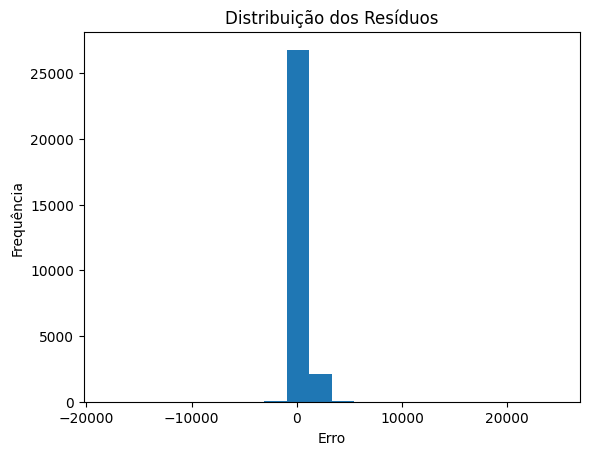

In [30]:
# Calcula os resíduos (diferença entre valores reais e previstos)
residuos = y_test - y_pred.flatten()

# Plota o histograma dos resíduos com 20 divisões (bins)
plt.hist(residuos, bins=20)

plt.title('Distribuição dos Resíduos')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()

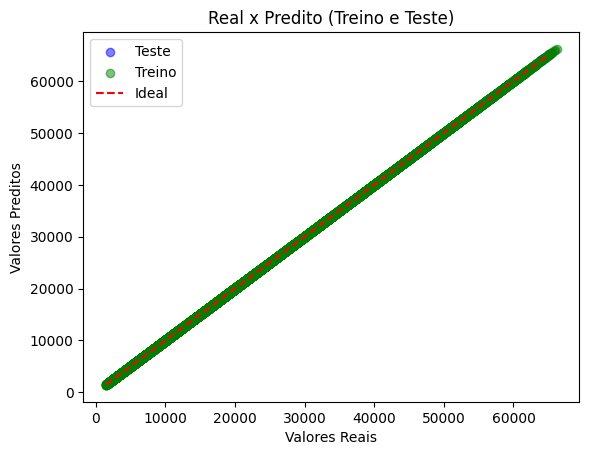

In [29]:
# Scatter plot para dados de teste
plt.scatter(y_test.to_numpy(), y_test, alpha=0.5, label='Teste', color='blue')

# Scatter plot para dados de treino
plt.scatter(y_train.to_numpy(), y_train, alpha=0.5, label='Treino', color='green')

# Linha perfeita (linha de referência)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')

# Títulos e legendas
plt.title('Real x Predito (Treino e Teste)')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()


# Conclusão

Concluímos que o nosso modelo apresenta métricas excelentes, resultado obtido graças à abordagem utilizada no treinamento e à escolha criteriosa dos dados.

Para implementações futuras, planejamos avaliar o desempenho desse modelo em um ambiente de produção, analisando como ele se comporta ao lidar com dados reais, em vez de sintéticos. Dessa forma, poderemos avaliar de maneira ainda mais precisa a qualidade do treinamento realizado.